I will be performing a survival analysis of the amount of days on Ibruntinib, where the event of interest is death (everything else is censored). 

I'll first be applying Kapler Meier curves. Note, for these, any stratification factor that is applied must be categorical (i.e. age and prior lines of therapy cannot be explored here) 

The relevant independent variables are: 
age of diagnosis, gender, platelet count, anti-coagulation, antiplatelet, invasive procedure (which I believe is PMHx bleeding risk), (maybe INR later), Molecular/cytogenetics, anemia, prior lines of therapy, major bleed (major vs. minor vs. none)

The relevant output variables are: duration on ibrunitinb and Death (by last FU) 

Import necessary libraries 

In [1]:
#install.packages(c("survival", "survminer"))

library("survival")
library("survminer")

print("complete")

Loading required package: ggplot2
Loading required package: ggpubr


[1] "complete"


Import the data

In [2]:
# Import the data and look at the first six rows
bleed_data <- read.csv(file = '/Users/anthonyquint/Desktop/LHSC_Work_Folder/Mina/Bleeding_study/Ibrutinib Data Set, July 13,2021, de- identified data_cleaned_forSurvAnal.csv')
## bleed_data_cyto is the dataset with the rows that have 'unknown' cytogenetics removed. Only use this data set 
## when plotting survival curves where cytogenetics are the stratification factor 
bleed_data_cyto <- read.csv(file = '/Users/anthonyquint/Desktop/LHSC_Work_Folder/Mina/Bleeding_study/Ibrutinib Data Set, July 13,2021, de- identified data_cleaned_forSurvAnal_CtyoCleaned.csv')
head(bleed_data)


X,Age.at.diagnosis,gender,Platelets...50..Y.N.,Plt.Nadir.while.on.Ibrutinib,Anemia..hb...100...Y.N.,Anemia..hb...110...Y.N.,HR.Molecular.Cytogenetics..Y.N.,Prior.lines.of.therapy,Prior.lines.of.therapy.1,...,Major.Bleed..Y.N.,Major.Bleed,Minor.Bleed,duration.of.ibrutinib..in.days.,Death..only.by.last.FU.,Bleed.1_MajOrMin.1...censored..2...event.,Bleed.1_Time_on_Ibruntinib,Bleed.2_MajOnly.1...censored..2...event.,Bleed.2_Time_on_Ibruntinib,blah
0,48,0,1,15,1,1,1,1,1,...,0,0,0,670,1,1,670,1,670,1
1,66,1,0,93,1,1,1,0,0,...,1,0,1,502,1,2,466,1,502,1
2,74,0,0,189,1,1,1,1,1,...,0,0,0,103,1,1,103,1,103,1
3,53,0,1,40,0,0,0,2,0,...,0,0,0,1316,2,1,1316,1,1316,1
4,60,1,1,49,0,1,0,3,0,...,2,1,0,2086,2,2,NA,2,NA,1
5,51,1,1,16,1,1,0,2,0,...,0,0,0,1870,1,1,1870,1,1870,1


Fit a kapler meier curve

In [3]:
fit <- survfit(Surv(Bleed.2_Time_on_Ibruntinib,Bleed.2_MajOnly.1...censored..2...event.) ~ blah, data = bleed_data)
print(fit)
summary(fit)
summary(fit)$table

Call: survfit(formula = Surv(Bleed.2_Time_on_Ibruntinib, Bleed.2_MajOnly.1...censored..2...event.) ~ 
    blah, data = bleed_data)

   1 observation deleted due to missingness 
         n events median 0.95LCL 0.95UCL
blah=0   2      0     NA      NA      NA
blah=1 166     16     NA      NA      NA


Call: survfit(formula = Surv(Bleed.2_Time_on_Ibruntinib, Bleed.2_MajOnly.1...censored..2...event.) ~ 
    blah, data = bleed_data)

1 observation deleted due to missingness 
                blah=0 
     time n.risk n.event survival std.err lower 95% CI upper 95% CI

                blah=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    0    166       1    0.994 0.00601        0.982        1.000
    6    164       1    0.988 0.00849        0.971        1.000
    8    163       1    0.982 0.01038        0.962        1.000
   14    162       1    0.976 0.01196        0.953        1.000
   15    160       2    0.964 0.01459        0.935        0.993
   35    155       1    0.957 0.01576        0.927        0.989
   36    154       1    0.951 0.01684        0.919        0.985
   72    150       1    0.945 0.01788        0.910        0.981
   73    149       1    0.938 0.01886        0.902        0.976
  153    138       1    0.932 0.01991        0.893        0.972
  161

,records,n.max,n.start,events,*rmean,*se(rmean),median,0.95LCL,0.95UCL
blah=0,2,2,2,0,2405.000,0.00000,NA,NA,NA
blah=1,166,166,166,16,2152.764,60.17611,NA,NA,NA


Plot kapler meier curve

Warning message in .add_surv_median(p, fit, type = surv.median.line, fun = fun, :
“Median survival not reached.”

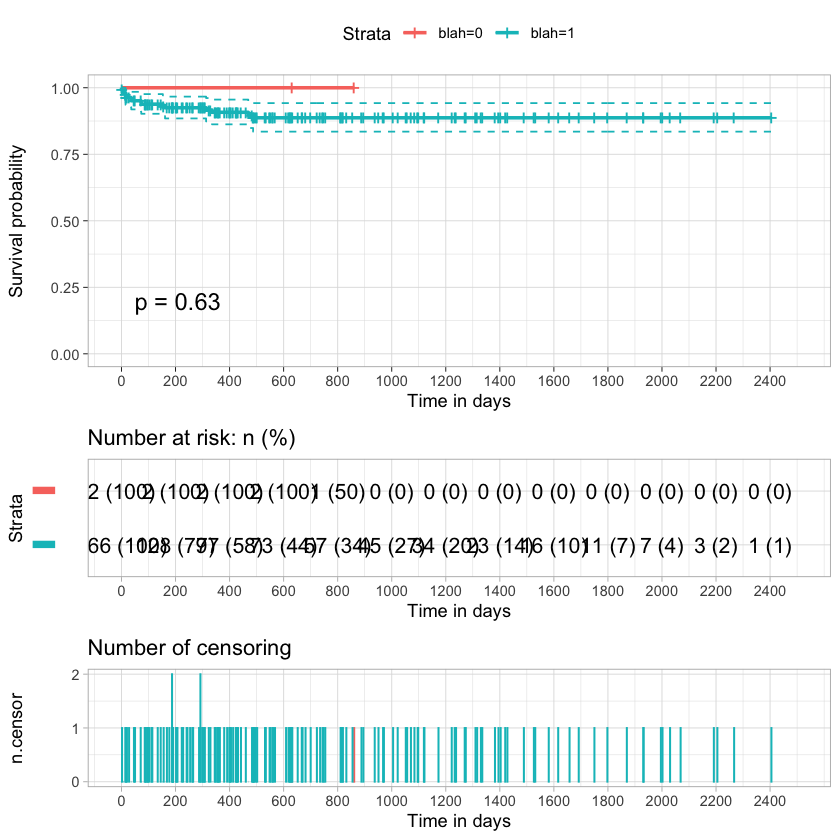

In [4]:
ggsurvplot(
   fit,                     # survfit object with calculated statistics.
   pval = TRUE,             # show p-value of log-rank test.
   conf.int = TRUE,         # show confidence intervals for 
                            # point estimaes of survival curves.
   conf.int.style = "step",  # customize style of confidence intervals
   xlab = "Time in days",   # customize X axis label.
   break.time.by = 200,     # break X axis in time intervals by 200.
   ggtheme = theme_light(), # customize plot and risk table with a theme.
   risk.table = "abs_pct",  # absolute number and percentage at risk.
  risk.table.y.text.col = T,# colour risk table text annotations.
  risk.table.y.text = FALSE,# show bars instead of names in text annotations
                            # in legend of risk table.
  ncensor.plot = TRUE,      # plot the number of censored subjects at time t
  surv.median.line = "hv",  # add the median survival pointer.
  #legend.labs = 
   # c("Female", "Male"),    # change legend labels.
  #palette = 
   # c("#E7B800", "#2E9FDF") # custom color palettes.
)

Log-Rank test to establish signficance 

In [ ]:
surv_diff <- survdiff(Surv(duration.of.ibrutinib..in.days.,Death..only.by.last.FU.) ~ Major.Bleed..Y.N., data = bleed_data)
surv_diff